-- Hyades open cluster (Epoch J2015.5) -- 

-5 <= dec <= 40
35 <= ra <= 95
19 <= parallax <= 24


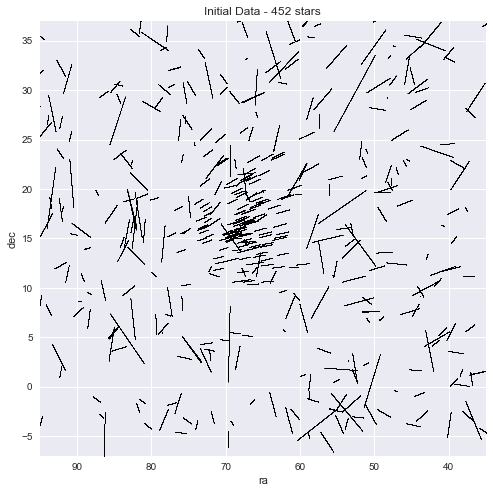

,source_id,ra,dec,pmra,pmdec,radial_velocity,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,18161561269840768,39.965219,5.580438,246.469926,-107.183118,-1.834031,19.502124,11.728789,12.686516,10.771701
1,152451414656258560,65.979650,27.822370,-16.019586,-40.951804,38.228804,19.506931,10.508432,11.189048,9.741240
2,223787797787973120,57.004644,38.344293,-64.729618,12.172372,-28.901162,19.515218,8.233910,8.580920,7.758838
3,161788841059992960,73.734379,34.168481,-57.467374,-63.925680,-15.769661,19.518042,9.457328,9.952966,8.829298
4,3373723237944913280,92.424369,19.092142,-31.676959,-170.374820,-34.362040,19.524242,9.622684,10.133513,8.992010


In [169]:
# Hyades - October 2018
data = 'SELECT TOP 10000 gaia.source_id, gaia.ra, gaia.dec, gaia.pmra, gaia.pmdec, gaia.radial_velocity, \
    gaia.parallax, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag \
    FROM gaiadr2.gaia_source as gaia WHERE gaia.ra >= 35 and gaia.ra <= 95 and \
    gaia.dec <= 40 and gaia.dec >= -5 and gaia.parallax > 19.5 and gaia.parallax < 23.5 and \
    gaia.pmra is not null and gaia.pmdec is not null and gaia.phot_bp_mean_mag is not null and \
    gaia.phot_rp_mean_mag is not null and gaia.phot_g_mean_mag is not null and gaia.radial_velocity is not null'

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics as stat
import scipy.stats as st
import random as rand

def pc_ly(x):
    return (1/(float(x)/1000))*3.26156
def mas_deg(x):
    return x*(1/1000)/3600
def abs_mag(x,y):
    return x - (5 * (np.log10(y/10))) 
def color(x,y):
    return [y[i]-x[i] for i in range(len(x))]
def z_score(x,y,z):
    return (x-y)/z
    
hyades1 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Hyades-Open-Cluster/para1.csv')

print('-- Hyades open cluster (Epoch J2015.5) -- ')
print()
print('-5 <= dec <= 40\n35 <= ra <= 95\n19 <= parallax <= 24')

ra0, dec0 = hyades1['ra'], hyades1['dec'] 
pmra, pmdec = mas_deg(hyades1['pmra']), mas_deg(hyades1['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([95,35])
plt.ylim([-7,37])
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Initial Data - {} stars'.format(len(hyades1)))
for i in range(len(hyades1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
hyades1.head()

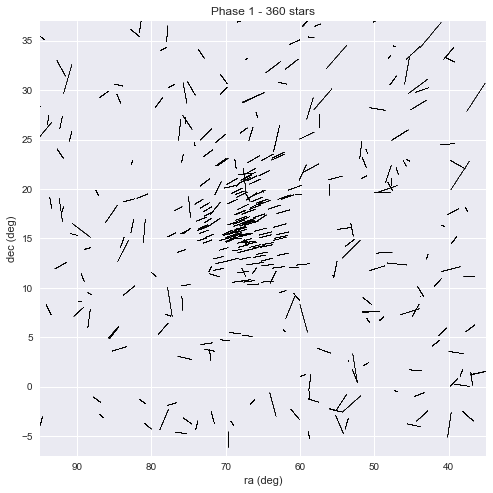

In [170]:
# membership 
members = []
delta = pmdec
mu = np.mean(pmdec)
std = np.std(pmdec)
score1 = [z_score(i,mu,std) for i in delta]
delta = pmra
mu = np.mean(pmra)
std = np.std(pmra)
score2 = [z_score(i,mu,std) for i in delta]
delta = hyades1['radial_velocity']
mu = np.mean(hyades1['radial_velocity'])
std = np.std(hyades1['radial_velocity'])
score3 = [z_score(i,mu,std) for i in delta]

for i in range(0,len(delta)):
    if score1[i] >=   -1.65 and score1[i] <=  1.65 \
        and score2[i] >=  -1.65 and score2[i] <=  1.65 \
        and score3[i] >=  -1.65 and score3[i] <=  1.65:
            members.append(list(hyades1.loc[i]))
        
# plotting filtered members 
members = pd.DataFrame(members, columns = list(hyades1))
ra0, dec0 = members['ra'], members['dec'] 
pmra, pmdec = mas_deg(members['pmra']), mas_deg(members['pmdec'])
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.xlim([95,35])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members)))
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,50):
        ra.append(ra0[i]+(pmra[i]*x*10))
        dec.append(dec0[i]+(pmdec[i]*x*10))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

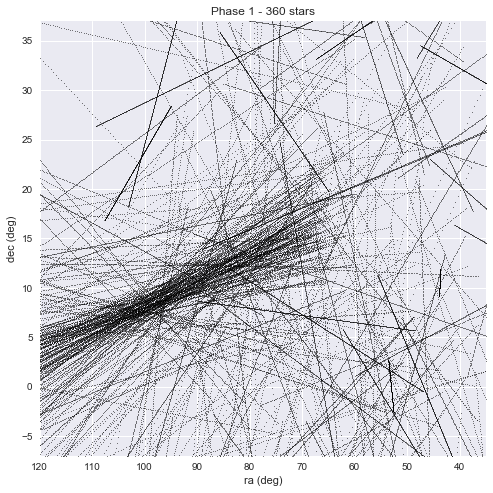

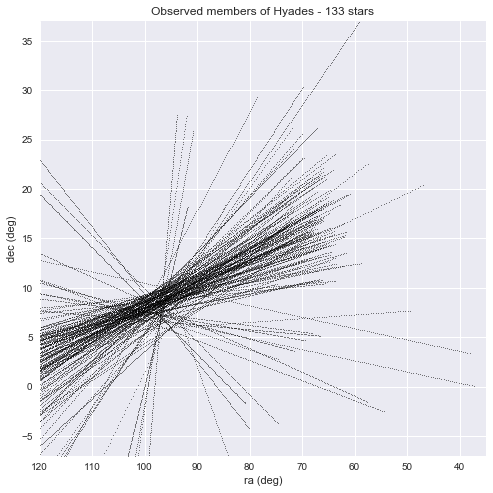

Predicted point of convergence D = [99,96] x [9,6]
Perryman et al., 1998, (96.6 ra, 5.8 dec) 


In [171]:
# view of intermediate filtering over long term
plt.figure(figsize=(8,8))
plt.xlim([120,35])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Phase 1 - {} stars'.format(len(members)))
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()

# point convergence
final = []
raa = []
decc = []
for i in range(len(members)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    raa.append(ra)
    decc.append(dec)

# D = [99,96] x [9,6]
for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= 98 and raa[i][x] >= 94 and \
        decc[i][x] <= 10 and decc[i][x] >= 6:
            final.append(list(members.loc[i]))
            break
            
# plotting results 
plt.figure(figsize=(8,8))
plt.xlim([120,35])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Observed members of Hyades - {} stars'.format(len(final)))
final = pd.DataFrame(final, columns = list(hyades1))

ra0, dec0 = final['ra'], final['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])
for i in range(len(final)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
print('Predicted point of convergence D = [99,96] x [9,6]')
print('Perryman et al., 1998, (96.6 ra, 5.8 dec) ')

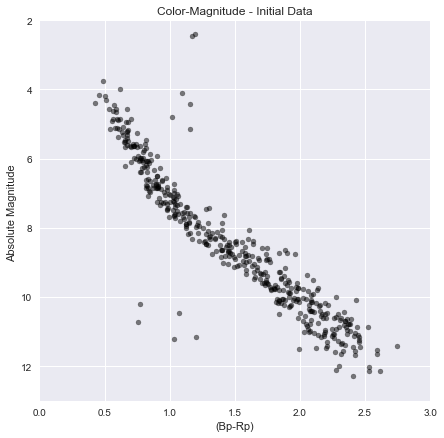

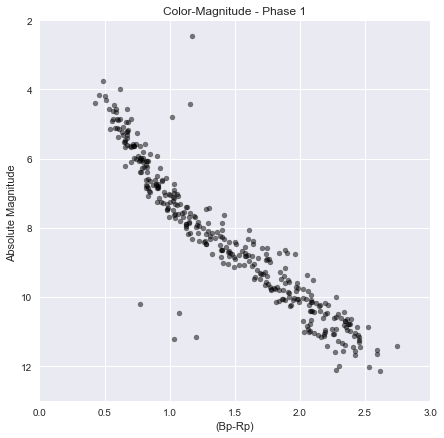

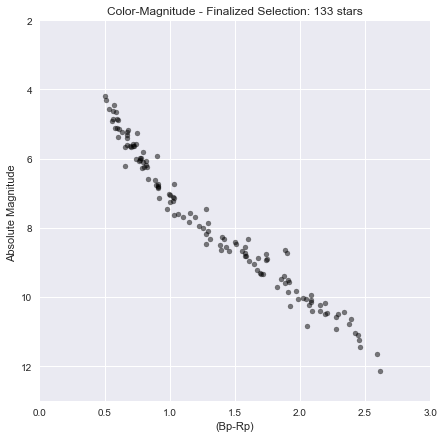

In [172]:
#color magnitude diagrams for different stages of membership
M_g = [abs_mag(hyades1['phot_g_mean_mag'][i],hyades1['parallax'][i]) for i in range(len(hyades1['ra']))]
M_rp = [abs_mag(hyades1['phot_rp_mean_mag'][i],hyades1['parallax'][i]) for i in range(len(hyades1['ra']))]
M_b = [abs_mag(hyades1['phot_bp_mean_mag'][i],hyades1['parallax'][i]) for i in range(len(hyades1['ra']))]
color_index = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Initial Data')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([13,2])
plt.scatter(color_index, M_g,marker='o', s=25,alpha = .5, c = 'k')
plt.style.use('seaborn')
plt.show() 

M_g = [abs_mag(members['phot_g_mean_mag'][i],members['parallax'][i]) for i in range(len(members['ra']))]
M_rp = [abs_mag(members['phot_rp_mean_mag'][i],members['parallax'][i]) for i in range(len(members['ra']))]
M_b = [abs_mag(members['phot_bp_mean_mag'][i],members['parallax'][i]) for i in range(len(members['ra']))]
color_index = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Phase 1')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([13,2])
plt.scatter(color_index, M_g,marker='o', s=25, alpha = .5,c = 'k')
plt.style.use('seaborn')
plt.show()

M_gF = [abs_mag(final['phot_g_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
M_rp = [abs_mag(final['phot_rp_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
M_b = [abs_mag(final['phot_bp_mean_mag'][i],final['parallax'][i]) for i in range(len(final['ra']))]
color_indexF = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Finalized Selection: {} stars'.format(len(final)))
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([0,3])
plt.ylim([13,2])
plt.scatter(color_indexF, M_gF,marker='o', s=25, alpha = .5,c = 'k')
plt.style.use('seaborn')
plt.show()

In [173]:
# positions after 1,000,000 years
final['dist'] = [1/(i/1000) for i in final['parallax']] # pc 
final['rad_v'] = [i*(1.022035e-6) for i in final['radial_velocity']] # km/s -> pc / yr 
finra = []
findec = []
findist = []
pm_scalar = []

# final positions
for i in range(len(final['ra'])):
    finra.append(final['ra'][i] + (mas_deg(final['pmra'][i] * 1000000)))
    findec.append(final['dec'][i] + (mas_deg(final['pmdec'][i] * 1000000)))
    findist.append(final['dist'][i] + final['rad_v'][i]* 1000000) # pc + pc 
final['finra'] = finra
final['findec'] = findec
final['findist'] = findist

# arc/yr, magnitude of <ra + dec> 
for i in range(len(final['pmra'])):
    pm_scalar.append(np.sqrt((final['pmra'][i]/1000)**2+(final['pmdec'][i]/1000)**2))
tang_v = [pm_scalar[i]*final['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
final['pm_scalar'] = pm_scalar
final['tang_v'] = tang_v
final['true_v'] = [np.sqrt((final['tang_v'][i])**2 + (final['radial_velocity'][i])**2) \
                   for i in range(len(final['tang_v']))]
final.head()

,source_id,ra,dec,pmra,pmdec,radial_velocity,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dist,rad_v,finra,findec,findist,pm_scalar,tang_v,true_v
0,3.212750e+18,74.609528,-3.732688,82.984264,44.645771,46.286953,19.545170,6.866740,7.101802,6.430762,51.163535,0.000047,97.660713,8.668915,98.470421,0.094232,22.852641,51.620976
1,3.314484e+18,66.996162,18.500106,104.045114,-39.015701,34.509997,19.558208,9.782602,10.384859,9.076788,51.129427,0.000035,95.897583,7.662411,86.399853,0.111120,26.930272,43.774187
2,5.254824e+16,64.139976,21.907302,104.830750,-38.403547,38.122167,19.570775,8.923047,9.349703,8.371102,51.096597,0.000039,93.259629,11.239650,90.058787,0.111644,27.039870,46.738145
3,3.313948e+18,66.093255,17.078840,99.753418,-26.880896,38.538139,19.592217,6.839261,7.087849,6.488092,51.040675,0.000039,93.802538,9.611924,90.428002,0.103312,24.994512,45.933798
4,3.406943e+18,73.098408,18.996756,79.128360,-35.218230,41.425628,19.673985,9.932267,10.521139,9.240009,50.828542,0.000042,95.078508,9.213914,93.166985,0.086612,20.867170,46.384496


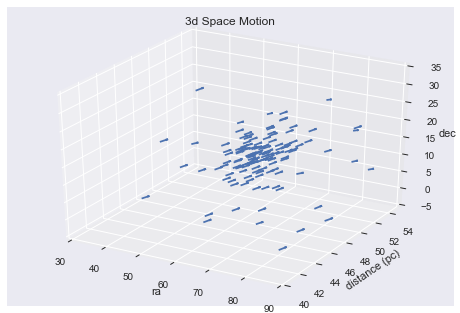

Center of Mass: (68.02 ra, 15.83 dec)
Perryman et al., 1998, (66.75 ra, 15.6 dec)
Mean true velocity: 45.02 km/s


In [174]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(30, 90)
ax.set_ylim3d(40, 55)
ax.set_zlim3d(-5, 35)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')

start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
# ra = y, dist = x, dec = z

ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)

plt.show()
print('Center of Mass: ({} ra, {} dec)'.format(round(np.mean(final['ra']),2),round(np.mean(final['dec']),2)))
print('Perryman et al., 1998, (66.75 ra, 15.6 dec)')
print('Mean true velocity: {} km/s'.format(np.round(np.mean(final['true_v']),2)))

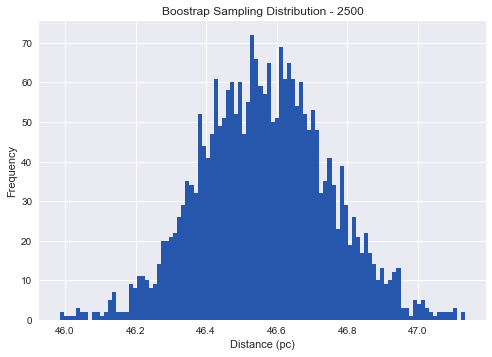

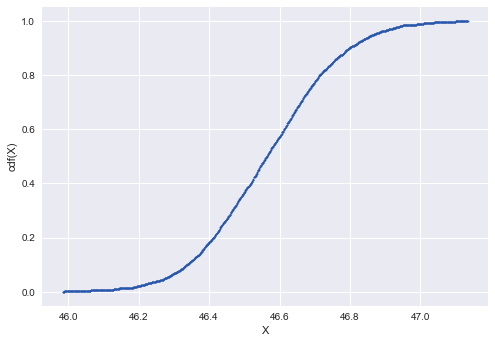

Estimated distance to Hyades open cluster (46.27,46.87), 90% confidence
Perryman et al.(1998), 46.07 parsecs to 46.61 parsecs.


In [175]:
# Estimated distance to Hyades open cluster with 95% level of confidence (bootstrap resampling)
dist = 1/(final['parallax']/1000)
samp = len(dist) # sample size 
p_boot = []
for i in range(2500):
    index = [rand.randint(0,samp-1) for i in range(samp)]
    p_boot.append(np.mean([dist[i] for i in index]))
    
plt.hist(p_boot,bins = 100, color = (39/255, 86/255, 173/255))
plt.title('Boostrap Sampling Distribution - 2500')
plt.ylabel('Frequency')
plt.xlabel('Distance (pc)')
plt.show()

x = np.arange(round(min(p_boot),3),round(max(p_boot),3),.001)
cdf = []
for i in x:
    cdf.append(sum(x<i for x in p_boot)/len(p_boot))
plt.scatter(x, cdf, s=2, color=(39/255, 86/255, 173/255))
plt.xlabel('X')
plt.ylabel('cdf(X)')
plt.show()

lower = 0
upper = 0
for i in range(len(cdf)):
    if cdf[i] >= .049 and cdf[i] <= .051 :
        lower = i
        break
for i in range(len(cdf)):
    if cdf[i] >= .949 and cdf[i] <= .951:
        upper = i
        break
print('Estimated distance to Hyades open cluster ({},{}), 90% confidence'.format(round(x[lower],2),round(x[upper],2)))
print('Perryman et al.(1998), 46.07 parsecs to 46.61 parsecs.')

In [176]:
# no rv -> astrometric rv + rv -> cmd
que = 'SELECT TOP 10000 gaia.source_id, gaia.ra, gaia.dec, gaia.pmra, gaia.pmdec, gaia.radial_velocity, \
    gaia.parallax, gaia.phot_g_mean_mag, gaia.phot_bp_mean_mag, gaia.phot_rp_mean_mag \
    FROM gaiadr2.gaia_source as gaia WHERE gaia.ra >= 35 and gaia.ra <= 95 and \
    gaia.dec <= 40 and gaia.dec >= -5 and gaia.parallax > 19.5 and gaia.parallax < 23.5 and \
    gaia.pmra is not null and gaia.pmdec is not null and gaia.phot_bp_mean_mag is not null and \
    gaia.phot_rp_mean_mag is not null and gaia.phot_g_mean_mag is not null and gaia.radial_velocity is null'

def rad(x):
    return x*math.pi/180
def rv(ra,dec):
    v = [-5.9,45.65,5.65]
    return (v[0]*np.cos(ra)*np.cos(dec)) + (v[1]*np.cos(ra)*np.sin(dec)) + (v[2]*np.sin(ra))

hyades2 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Hyades-Open-Cluster/para2.csv') #w/o rv
dr2 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Hyades-Open-Cluster/para3.csv') #tot
dr1 = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Hyades-Open-Cluster/tgas.csv')
hip = pd.read_csv('/Users/landonbuechner/Documents/Git Hub Repositories/Hyades-Open-Cluster/astrostat_hip.csv')

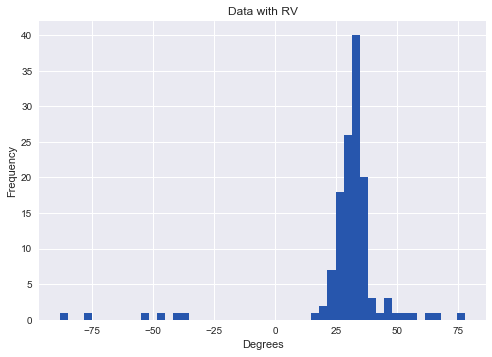

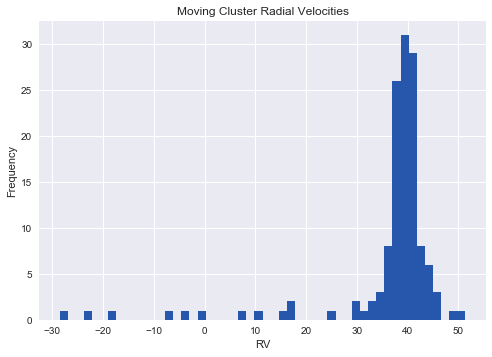

Mean Spectroscopic Radial Velocities: 36.09 km/s^-1
Radial Velocities from moving cluster method: 36.09 km/s^-1


In [177]:
# angle and rv of data with spectroscopic rv
lambd = []
rvs = []
for i in range(len(final)):
    lambd.append(180*math.atan(4.74*final['pm_scalar'][i]/final['radial_velocity'][i]*final['dist'][i])/math.pi)
    
plt.hist(lambd,bins = 50, color = (39/255, 86/255, 173/255))
plt.ylabel('Frequency')
plt.xlabel('Degrees')
plt.title('Data with RV')
plt.show()

for i in range(len(final)):
    rvs.append((4.74*final['pm_scalar'][i]*final['dist'][i])/(np.tan(np.radians(lambd[i]))))
    
plt.hist(rvs,bins = 50, color = (39/255, 86/255, 173/255))
plt.ylabel('Frequency')
plt.xlabel('RV')
plt.title('Moving Cluster Radial Velocities')
plt.show()
print('Mean Spectroscopic Radial Velocities: {} km/s^-1'.format(round(np.mean(final['radial_velocity']),2)))
print('Radial Velocities from moving cluster method: {} km/s^-1'.format(round(np.mean(rvs),2)))

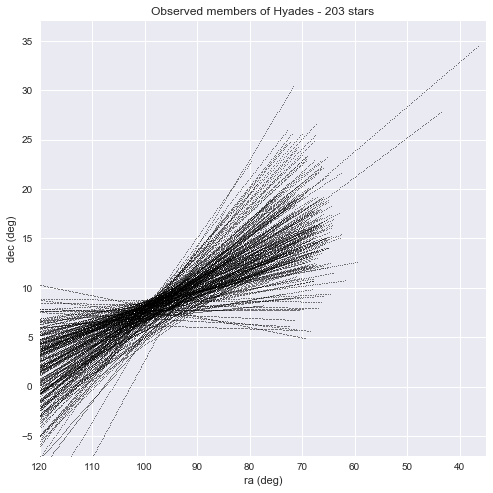

Predicted point of convergence D = [99,96] x [9,6]
Perryman et al., 1998, (96.6 ra, 5.8 dec) 


In [178]:
# membership for data without rv 
# calculations
pm_scalar = []
hyades2['dist'] = [1/(i/1000) for i in hyades2['parallax']]
for i in range(len(hyades2['pmra'])):
    pm_scalar.append(np.sqrt((hyades2['pmra'][i]/1000)**2+(hyades2['pmdec'][i]/1000)**2))
hyades2['pm_scalar'] = pm_scalar
tang_v = [pm_scalar[i]*hyades2['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 


# rv
lambd1 = np.mean(lambd)
rvs = []
for i in range(len(hyades2)):
    rvs.append((4.74*hyades2['pm_scalar'][i]*hyades2['dist'][i])/(np.tan(np.radians(lambd1))))

hyades2['rad_v'] = rvs
# plotting and filtering
ra0, dec0 = hyades2['ra'], hyades2['dec'] 
pmra, pmdec = mas_deg(final['pmra']), mas_deg(final['pmdec'])
pmraT, pmdecT= mas_deg(hyades2['pmra']), mas_deg(hyades2['pmdec'])

members1 = []
delta = pmdecT
mu = np.mean(pmdec)
std = np.std(pmdec)
score1 = [z_score(i,mu,std) for i in delta]
delta = pmraT
mu = np.mean(pmra)
std = np.std(pmra)
score2 = [z_score(i,mu,std) for i in delta]
delta = hyades2['rad_v']
mu = np.mean(final['radial_velocity'])
std = np.std(final['radial_velocity'])
score3 = [z_score(i,mu,std) for i in delta]
for i in range(0,len(delta)):
    if score1[i] >=   -1.65 and score1[i] <=  1.65 \
        and score2[i] >=  -1.65 and score2[i] <=  1.65 \
        and score3[i] >=  -1.65 and score3[i] <=  1.65:
            members1.append(list(hyades2.loc[i]))

members1 = pd.DataFrame(members1, columns = list(hyades2))
ra0, dec0 = members1['ra'], members1['dec'] 
pmra, pmdec = mas_deg(members1['pmra']), mas_deg(members1['pmdec'])
final1 = []
raa = []
decc = []
for i in range(len(members1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    raa.append(ra)
    decc.append(dec)

# D = [99,96] x [9,6]
for i in range(len(raa)):
    for x in range(len(raa[i])):
        if raa[i][x] <= 99 and raa[i][x] >= 95 and \
        decc[i][x] <= 9 and decc[i][x] >= 6:
            final1.append(list(members1.loc[i]))
            break
            
plt.figure(figsize=(8,8))
plt.xlim([120,35])
plt.ylim([-7,37])
plt.ylabel('dec (deg)')
plt.xlabel('ra (deg)')
plt.title('Observed members of Hyades - {} stars'.format(len(final1)))
final1 = pd.DataFrame(final1, columns = list(hyades2))
ra0, dec0 = final1['ra'], final1['dec'] 
pmra, pmdec = mas_deg(final1['pmra']), mas_deg(final1['pmdec'])
for i in range(len(final1)):
    ra = []
    dec = []
    for x in range(1,5000,10):
        ra.append(ra0[i]+(pmra[i]*x*1000))
        dec.append(dec0[i]+(pmdec[i]*x*1000))
    plt.scatter(ra, dec, s = .2, c = 'k'  )
plt.show()
print('Predicted point of convergence D = [99,96] x [9,6]')
print('Perryman et al., 1998, (96.6 ra, 5.8 dec) ')

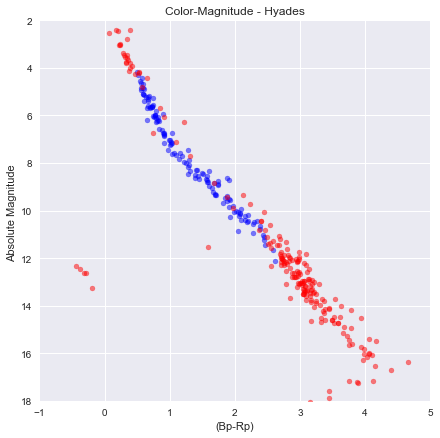

,source_id,ra,dec,pmra,pmdec,radial_velocity,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,dist,pm_scalar,rad_v
0,1.470225e+17,71.132172,23.940876,86.242118,-48.781909,NaN,19.503057,14.229694,15.885799,12.980967,51.274013,0.099083,43.645047
1,3.292187e+18,70.611323,7.784404,78.864824,-0.145198,NaN,19.518865,15.547404,17.633255,14.183756,51.232488,0.078865,34.711185
2,3.306443e+18,69.291679,12.105463,88.815709,-10.684800,NaN,19.532960,14.828397,16.616880,13.542532,51.195519,0.089456,39.344303
3,4.944851e+16,65.122873,21.378551,98.766760,-38.348703,NaN,19.547070,14.079307,15.779340,12.810906,51.158561,0.105950,46.565150
4,3.314394e+18,66.590890,18.000157,98.236443,-29.888829,NaN,19.551517,14.327611,16.150867,13.030619,51.146927,0.102683,45.118726


In [179]:
M_g = [abs_mag(final1['phot_g_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
M_rp = [abs_mag(final1['phot_rp_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
M_b = [abs_mag(final1['phot_bp_mean_mag'][i],final1['parallax'][i]) for i in range(len(final1['ra']))]
color_index1 = color(M_rp,M_b)
plt.figure(figsize=(7,7))
plt.title('Color-Magnitude - Hyades')
plt.xlabel('(Bp-Rp)')
plt.ylabel('Absolute Magnitude ')
plt.xlim([-1,5])
plt.ylim([18,2])
plt.scatter(color_indexF, M_gF,marker='o', s=25, alpha = .5,c = 'b')
plt.scatter(color_index1, M_g,marker='o', s=25, alpha = .5,c = 'r')
plt.style.use('seaborn')
plt.show()
final1.head()

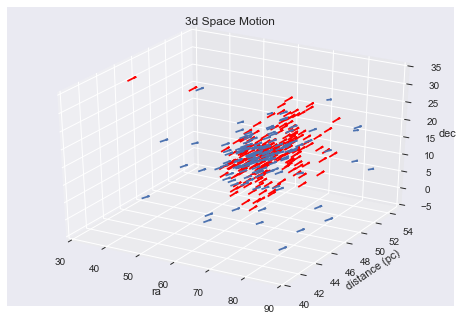

Total Hyades Members: 336
Hyades Members DR1 TGAS (Source 2): 251

Center of Mass: (68.57 ra, 16.07 dec)
Perryman et al., 1998, (66.75 ra, 15.6 dec)

Mean true velocity: 46.18 km/s
CERN (Source 3): (39.06,39.78) km*s^-1


In [180]:
final1['dist'] = [1/(i/1000) for i in final1['parallax']] # pc 
finra = []
findec = []
findist = []
pm_scalar = []

# final positions of additional stars 
for i in range(len(final1['ra'])):
    finra.append(final1['ra'][i] + (mas_deg(final1['pmra'][i] * 1000000)))
    findec.append(final1['dec'][i] + (mas_deg(final1['pmdec'][i] * 1000000)))
    findist.append(final1['dist'][i] + final1['rad_v'][i]* 1000000) # pc + pc 
for i in range(len(final1['pmra'])):
    pm_scalar.append(np.sqrt((final1['pmra'][i]/1000)**2+(final1['pmdec'][i]/1000)**2))
tang_v = [pm_scalar[i]*final1['dist'][i]*4.74 for i in range(len(pm_scalar))] # km/s 
final1['finra'] = finra
final1['findec'] = findec
final1['findist'] = findist
final1['pm_scalar'] = pm_scalar
final1['tang_v'] = tang_v
final1['true_v'] = [np.sqrt((final1['tang_v'][i])**2 + (final1['rad_v'][i])**2) \
                   for i in range(len(final1['tang_v']))]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(30, 90)
ax.set_ylim3d(40, 55)
ax.set_zlim3d(-5, 35)
ax.set_xlabel('ra')
ax.set_ylabel('distance (pc)')
ax.set_zlabel('dec')
ax.set_title('3d Space Motion')

start = [final['ra'],final['dist'],final['dec']]
end = [final['finra'],final['findist'],final['findec']]
start1 = [final1['ra'],final1['dist'],final1['dec']]
end1 = [final1['finra'],final1['findist'],final1['findec']]

# ra = y, dist = x, dec = z
ax.quiver(start[0], start[1], start[2], end[0], end[1], end[2], length = 1, normalize = True)
ax.quiver(start1[0], start1[1], start1[2], end1[0], end1[1], end1[2], length = 1, normalize = True,color ='r')

# combining df's
plt.show()
print('Total Hyades Members: {}'.format(len(final)+len(final1)))
print('Hyades Members DR1 TGAS (Source 2): {}'.format(251))
print()
print('Center of Mass: ({} ra, {} dec)'.format(round((np.mean(final['ra'])+np.mean(final1['ra']))/2,2),\
                                               round((np.mean(final['dec'])+np.mean(final1['dec']))/2,2),2))
print('Perryman et al., 1998, (66.75 ra, 15.6 dec)')
print()
print('Mean true velocity: {} km/s'.format(np.round((np.mean(final['true_v'])+np.mean(final1['true_v']))/2,2)))
print('CERN (Source 3): ({},{}) km*s^-1'.format(39.42-0.36,39.42+0.36)) # not a confidence interval 